<a href="https://colab.research.google.com/github/gslikhita/covinfo/blob/main/Student_Marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
doc= pd.read_csv('Student_Marks.csv')
print(doc)


    number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]


In [23]:
model = LinearRegression()

In [10]:
doc.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


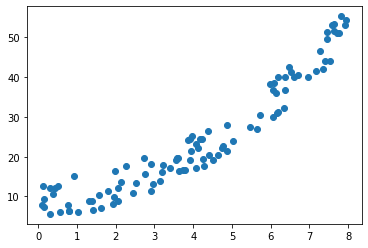

In [12]:
plt.scatter(x=doc.time_study, y = doc.Marks)

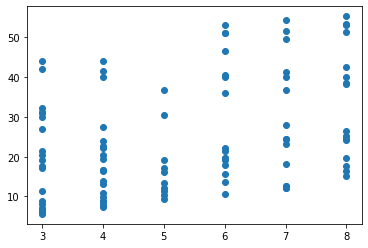

In [14]:
plt.scatter(x=doc.number_courses, y = doc.Marks)

In [17]:
X = doc.drop("Marks", axis = "columns")
X = X.drop("number_courses", axis = "columns")
y = doc.drop("time_study", axis = "columns")
y = y.drop("number_courses", axis = "columns")
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25 )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 1)
(25, 1)
(75, 1)
(25, 1)


In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_


array([[5.60627823]])

In [27]:
model.intercept_

array([1.44943549])

In [53]:
y_pred = model.predict(X_test)
y_pred

array([[21.82825686],
       [17.78052397],
       [23.42043987],
       [12.94791214],
       [ 3.18177546],
       [14.13083685],
       [44.33185767],
       [10.17841069],
       [45.03824873],
       [25.33218075],
       [15.56604407],
       [33.04081332],
       [10.58206273],
       [44.28700745],
       [21.58158061],
       [36.2139668 ],
       [ 3.82089118],
       [35.4403004 ],
       [37.19506549],
       [37.72766192],
       [15.11754182],
       [18.07765672],
       [27.98395035],
       [35.0030107 ],
       [21.66567479]])

In [29]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_time", "student_marks_original", "student_marks_prediction"])

,study_time,student_marks_original,student_marks_prediction
0,3.635,16.517,21.828257
1,2.913,18.238,17.780524
2,3.919,24.451,23.420440
3,2.051,12.209,12.947912
4,0.309,12.027,3.181775
5,2.262,17.705,14.130837
6,7.649,51.583,44.331858
7,1.557,10.429,10.178411
8,7.775,51.142,45.038249
9,4.260,19.466,25.332181


In [30]:
model.score(X_test,y_test)

0.8735491619664206

In [31]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 4.312611111108224
Mean Squared Error : 24.920675758099282
Root Mean Squared Error : 4.992061273472039


# **Multiple Regression**

In [40]:
X2 = doc[[ 'number_courses','time_study']]
y2 = doc.drop("time_study", axis = "columns")
y2 = y2.drop("number_courses", axis = "columns")

In [41]:
print(X2)

    number_courses  time_study
0                3       4.508
1                4       0.096
2                4       3.133
3                6       7.909
4                8       7.811
..             ...         ...
95               6       3.561
96               3       0.301
97               4       7.163
98               7       0.309
99               3       6.335

[100 rows x 2 columns]


In [42]:
print(y2)

     Marks
0   19.202
1    7.734
2   13.811
3   53.018
4   55.299
..     ...
95  19.128
96   5.609
97  41.444
98  12.027
99  32.357

[100 rows x 1 columns]


In [43]:
print(X2.shape)
print(y2.shape)

(100, 2)
(100, 1)


In [44]:
model2 = LinearRegression()

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(75, 2)
(25, 2)
(75, 1)
(25, 1)


In [46]:
model2.fit(X2, y2)

LinearRegression()

In [60]:
y2_pred = model2.predict(X2_test)
y2_pred

array([[38.86181159],
       [31.91300556],
       [25.04391608],
       [45.36102586],
       [ 2.48214492],
       [28.17137466],
       [13.16305462],
       [10.27042886],
       [ 7.53171115],
       [ 3.71315768],
       [39.77014475],
       [18.15723207],
       [15.45903967],
       [28.31848655],
       [15.29299919],
       [ 6.93106824],
       [32.74181097],
       [ 9.26351348],
       [21.21189613],
       [40.00777155],
       [23.11640925],
       [ 2.47134656],
       [45.82129011],
       [48.55327458],
       [28.56017846]])

In [55]:
model2.coef_

array([[1.86405074, 5.39917879]])

In [56]:
model.intercept_

array([1.44943549])

In [61]:
print('X2_test', 'y2_test', 'y2_pred' )

X2_test y2_test y2_pred


In [63]:
pd.DataFrame(np.c_[X2_test, y2_test, y2_pred], columns = ["no. of courses", "study_time", "student_marks_original", "student_marks_prediction2"])

,no. of courses,study_time,student_marks_original,student_marks_prediction2
0,3.0,7.543,43.978,38.861812
1,7.0,4.875,28.043,31.913006
2,6.0,3.948,21.400,25.043916
3,6.0,7.711,50.986,45.361026
4,3.0,0.805,6.349,2.482145
5,7.0,4.182,24.394,28.171375
6,4.0,2.438,10.844,13.163055
7,5.0,1.557,10.429,10.270429
8,4.0,1.395,8.920,7.531711
9,3.0,1.033,6.053,3.713158


In [66]:
from sklearn import metrics
print( 'MAE: ', metrics.mean_absolute_error(y2_test,y2_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y2_test,y2_pred)))

MAE:  2.8688412133457724
RMSE:  3.2676098835371623
